## Assignment 6: Albedo Feedback

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

### Part a

In [2]:
ai = 0.7
a0 = 0.289
T0 = 293 #K
Ti = 260 #K

In [52]:
# 3 cases of ice-albedo feedback
def calc_albedo(T):
    if T<=Ti:
        f = ai
    elif Ti<T<T0:
        f = a0 + (ai - a0) * ((T-T0)**2)/((Ti-T0)**2)
    else:
        f = a0
    return f

In [57]:
calc_albedo(288)

0.289

In [73]:
t0 = 250
tmax = 300
t = np.arange(t0,tmax,0.5)
np.shape(t)

(100,)

In [87]:
alb = np.arange(t0,tmax,0.5)
np.shape(alb)

(100,)

In [89]:
for T in range(0,100):
    temp = t[T]
    alb[T] = calc_albedo(temp)

Text(0.5, 1.0, 'Albedo as a function of global mean temperature')

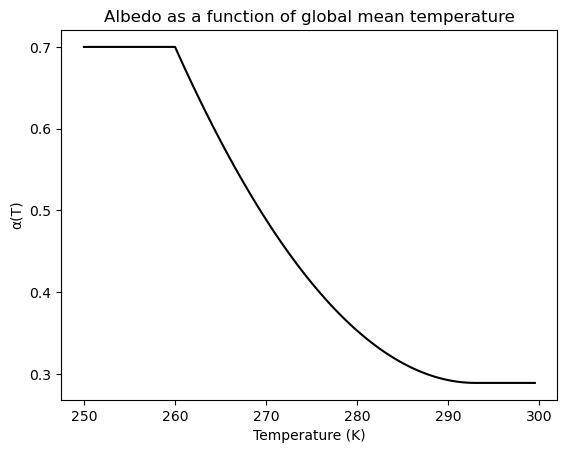

In [92]:
fig = plt.figure()
plt.plot(t,alb, 'k-')
plt.xlabel('Temperature (K)')
plt.ylabel('α(T)')
plt.title('Albedo as a function of global mean temperature')

### Part b

In [430]:
solarconstant = 1366 #W/m2
stefanboltzman = 5.670374419e-8 #W/m2/K4
heatcapacity = 4.0e8 #J/m2/K
epsilon = 0.78

ai = 0.7
a0 = 0.289
T0 = 293 #K
Ti = 260 #K

deleps = 0.02
neweps = epsilon + deleps
neweps

0.8

In [328]:
#calc_albedo(288.3280)

In [488]:
M = 2
u = np.zeros((M,))
T_s = 288.3280
# 288.3280 is the value of current surface temperature calculated in class
# Formula: T_s = ((solarconstant * (1 - a0) / 4) / (stefanboltzman * (1 - neweps / 2))) ** (1 / 4)
T_a = (neweps * stefanboltzman * T_s ** 4 / (2 * stefanboltzman)) ** (1 / 4)

In [489]:
#def surf_temp( T_s):
   # f = ((solarconstant * (1 - calc_albedo(T_s)) / 4) / (stefanboltzman * (1 - neweps / 2))) ** (1 / 4)
   # return f
#surf_temp(T_s)

In [490]:
u = np.zeros((M,))
#u0 = np.zeros((M))
u[0] = T_a
u[1] = T_s

In [491]:
def calc_warming( t, u): 
    f = np.zeros((M,))
    current_albedo = calc_albedo(u[1])
    f[0] = (solarconstant * (1-current_albedo)/4 - neweps*stefanboltzman*(u[0]**4) 
            - (1-neweps)*stefanboltzman*(u[1]**4))/heatcapacity
    f[1] = (solarconstant * (1-current_albedo)/4 + neweps*stefanboltzman*(u[0]**4) - 
            stefanboltzman*(u[1]**4))/heatcapacity
    return f

In [478]:
current_albedo

0.29284757987515625

In [492]:
# Set up time-dependency
Dt = 60*60*24*365 #time in years
t0 = 0
tmax = 100*Dt
t = np.arange(t0, tmax, Dt)
N = np.shape(t)[0]

In [493]:
sol = solve_ivp(calc_warming, [t0,tmax],u,method='RK45', t_eval=t)

In [494]:
print(sol.y[1])

[288.328      286.73437861 285.93043181 285.69937133 285.7200986
 285.86349446 286.2376686  286.8333008  287.50293377 287.97745427
 288.30728678 288.61501522 288.91945888 289.21661098 289.47963873
 289.66209182 289.77911063 289.87030573 289.95560218 290.04528941
 290.14002116 290.23081553 290.29905498 290.31841667 290.29659643
 290.26262074 290.23684302 290.23262556 290.25633952 290.30736493
 290.3780907  290.45391459 290.51324325 290.52749219 290.45757582
 290.30637607 290.14113169 290.01549877 289.96589224 290.01148587
 290.15421226 290.37876289 290.65258805 290.92589689 291.1316574
 291.18559642 291.00042837 290.75563908 290.58010442 290.50134474
 290.51543598 290.58700968 290.649253   290.6137945  290.54801073
 290.49815526 290.46613407 290.45035144 290.44570998 290.44361057
 290.43226768 290.40870303 290.38183006 290.35900602 290.34533998
 290.34369282 290.35467721 290.37665766 290.40575047 290.43582374
 290.4584974  290.46314316 290.43352264 290.36200357 290.27551626
 290.1976773

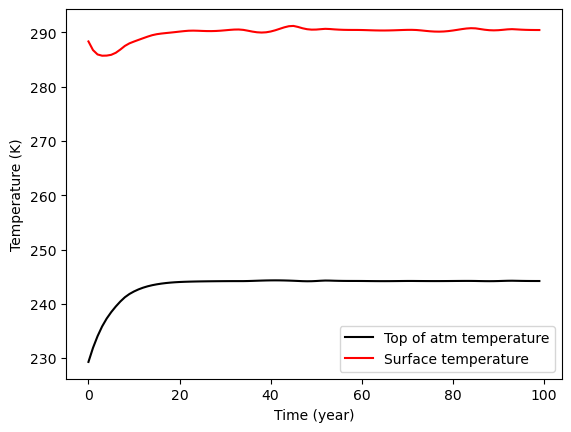

In [495]:
fig = plt.figure()
plt.plot(sol.t / (60*60*24*365), sol.y[0], 'k-', label='Top of atm temperature')
plt.plot(sol.t / (60*60*24*365), sol.y[1], 'r-', label='Surface temperature')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (K)')
plt.legend()

In [496]:
initial_surface_temp = T_s
final_surface_temp = sol.y[1][-1]
total_warming = final_surface_temp - initial_surface_temp

In [497]:
print("Total warming (new equilibrium surface temperature - initial surface temperature) is %0.4f" % (total_warming))

Total warming (new equilibrium surface temperature - initial surface temperature) is 2.1020


In [ ]:
# Surface temperature is 288.32

T_s = ((solarconstant*(1-albedo) /4) / (stefanboltzman*(1-epsilon/2))) ** (1/4)
T_s_new = ((solarconstant*(1-albedo) /4) / (stefanboltzman*(1-neweps/2))) ** (1/4)


warming = T_s_new - T_s
print(warming)

In [96]:
deleps = -4 / (stefanboltzman* T_a**4 - stefanboltzman*T_s**4)
neweps = eps + deleps

In [98]:
T_s_new = ((solarconstant*(1-albedo) /4) / (stefanboltzman*(1-neweps/2))) ** (1/4)
print("Average temperature of the earth is %0.4f Kelvin or %0.4f deg C" % (T_s_new, T_s_new-273.15))

Average temperature of the earth is 290.5401 Kelvin or 17.3901 deg C


In [99]:
warming = T_s_new - T_s
print("Warming of the earth's surface is %0.4f Kelvin" % (warming))

Warming of the earth's surface is 1.0182 Kelvin
